573 573 128 128
632 632 128 128
73223 73223
80832 80832
roc_auc_score:0.6955404830296512
roc_auc_score:0.7994927401775063
[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
fpr [0.         0.24069809 1.        ]
tpr [0.         0.63177906 1.        ]
fpr1 [0.        0.1854228 1.       ]
tpr1 [0.         0.78440828 1.        ]


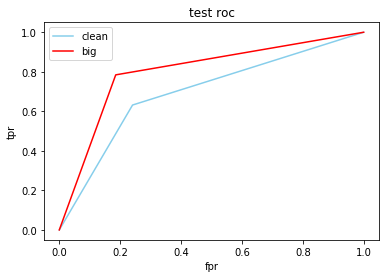

In [6]:
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import pickle
import os
%matplotlib inline

class ROC():
    def __init__(self):
        self.roc_dir = "fprtpr"
        self.predict = self.read_list(os.path.join(self.roc_dir,"valid_3layernonlinear_2fearurescleanadam.pickle_predict.pkl"))
        self.targets = self.read_list(os.path.join(self.roc_dir,"valid_3layernonlinear_2fearurescleanadam.pickle_targets.pkl"))
        self.predict1 = self.read_list(os.path.join(self.roc_dir,'valid_3layernonlinear_2fearurescleanadam_predict.pkl'))
        self.targets1 = self.read_list(os.path.join(self.roc_dir,'valid_3layernonlinear_2fearurescleanadam_targets.pkl'))
        
    def read_list(self,filename):
        with open(filename,'rb') as f:
            my_list = pickle.load(f)
        return my_list

    def makeROC(self):
        print(len(self.predict),len(self.targets),len(self.predict[0]),len(self.targets[0]))
        print(len(self.predict1),len(self.targets1),len(self.predict1[0]),len(self.targets1[0]))
        
        predict_flatten = [x for sublist in self.predict for x in sublist]
        target_flatten = [x for sublist in self.targets for x in sublist]
        
        predict_flatten1 = [x for sublist in self.predict1 for x in sublist]
        target_flatten1 = [x for sublist in self.targets1 for x in sublist]
        
        print(len(predict_flatten), len(target_flatten))
        print(len(predict_flatten1), len(target_flatten1))
        
        print(f"roc_auc_score:{roc_auc_score(target_flatten,predict_flatten)}")
        print(f"roc_auc_score:{roc_auc_score(target_flatten1,predict_flatten1)}")
        #print(predict_flatten[0:100],)
        fpr, tpr, thresholds = roc_curve(target_flatten, predict_flatten, pos_label=1)
        fpr1, tpr1, thresholds1 = roc_curve(target_flatten1, predict_flatten1, pos_label=1)
        
        #plot fpr vs. tpr;tpr = y axis
        print(type(fpr),type(tpr))
        print(type(fpr1),type(tpr1))
        
        print('fpr',fpr)
        print('tpr',tpr)
        print('fpr1',fpr1)
        print('tpr1',tpr1)
        
        np.save('fpr.npy', fpr)
        np.save('tpr.npy', tpr)
        np.save('fpr1.npy', fpr1)
        np.save('tpr1.npy', tpr1)
        plt.plot(fpr,tpr, color='skyblue',label="clean")
        plt.plot(fpr1,tpr1, color='red',label="big")
        plt.legend()
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        plt.title("test roc")
        plt.show()

roc = ROC()
roc.makeROC()
